 

# Project: Investigate a Dataset - Medical Appointment No Shows

# Xiaowen Chen  June 2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#research">Research Questions</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> In this project, I investigated a dataset of medical appoinment records for Brasil public hospitals. The data includes some demographic information, health condition, and other components of patients. All these variables are contribute to the state of whether the patients showed up to appointments or not. The analysis is focused on the factors that influencing patients to show or not show up to appointments.


> This dataset downloaded from Kaggle. The data collected information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.



## General Research Question 
### How do different group of patients performance no show in the appointments?

First, import all the packages will be needed in this project

In [1]:

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import csv as csv
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

Read the data file and show the first several rows for reviewing.
Us df.shape,df.describe,df.describe,df,info,etc to see the description information of the raw data.

In [2]:
#Read data file
df=pd.read_csv('noshow.csv')


In [3]:
#Print out a few lines. 
df.head()
#Rename "No-show" to "No_show"
df=df.rename(columns={"No-show": "NoShow"})

>The variables are:

#### PatientId: 
>Identification number of a patient

#### AppointmentID: 
>Identification number of each appointment

#### Gender: 
>Male or Female

#### ScheduledDay: 
>The day that the patient set up the appointment

#### AppointmentDay: 
>The day that the patient actually participated the appointment

#### Age: 
>How old is the patient

#### Neighbourhood: 
>Where the appointment takes place

#### Scholarship: 
>True or False, indicates if the patient is in the Brazilian welfare program - Bolsa Familia program

#### Hipertension: 
>True or False, indicates if the patient had Hipertension.

#### Diabetes:
>True or False, indicates if the patient had Diabeties

#### Alcoholism: 
>True or False, indicates if the patient is an alcoholic

#### Handcap: 
>True or False, indicates if the patient is handicapped

#### SMS_received: 
>1 or more messages sent to the patient

#### No_show:
>"No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

In [4]:
df.shape

(110527, 14)


There are 110,527 subjects and 14 columns in the data.

In [5]:
# checking for general data duplicates
df.duplicated().sum()
df.PatientId.duplicated().sum()
df.AppointmentID.duplicated().sum()


0

There is no duplicated subjects in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
NoShow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Initial Observations

The data had 110,527 subjects in 14 variables.

df.info() told us there are no missing values for the whole dataset. 

PatientId is on float data type, which should be in string. ApporintmentID, Age, Scholarship, Hipertension, Diabeties, Alcoholism, Handcap and SMS_received is on a integer data type. The rest of the data records were as the objects. Scholarship, Hipertension, Diabeties, Alcoholism, and Handcap had two data entries, such that True (1), False (0).

The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows.

The scheduled_day and appointment_day columns type should be changed to datetime。

I decided to keep PatientID as a reference column but and I will AppointmentID, since it is useless for the analysis
No-Show is the dependent variable, which indicated whether the patient attended the appointment. The rest of the variables were the independent variables, which possibly contribute to the result of dependent variable. 



#### Check if we need to create more columns with usefull data for the exploration
We can add one more column to show which day of the week of the appointment is to explore where the day of the week is also another factor.

### Data Cleaning


1. PatientId should be converted into string data type.

In [7]:
# formatting the patient_id column as string
df.PatientId = df.PatientId.apply(lambda patient: str(int(patient)))

2. Drop AppointmentID variable.

In [8]:
# Remove some useless columns
# I think the AppointmentID is useless for this analysis
df.drop(['AppointmentID'], axis=1, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'NoShow'],
      dtype='object')

3. The scheduled_day and appointment_day columns type should be changed to datetime.


In [9]:
# Formatting the date time 'scheduled_day' and 'appointment_day' columns

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

df.ScheduledDay.head(1), df.AppointmentDay.head(1)

(0   2016-04-29 18:38:08
 Name: ScheduledDay, dtype: datetime64[ns], 0   2016-04-29
 Name: AppointmentDay, dtype: datetime64[ns])

4. Add one more column as WeekDay.
WeekDay: to show what day of the week the appointment was scheduled

In [10]:
# creating the first column "appointment_week_day"
df['WeekDay'] = df.AppointmentDay.map(lambda day: day.day_name())
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,WeekDay
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [11]:
#Take a look at age variable
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

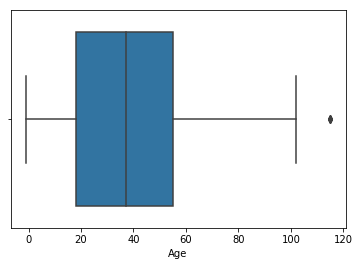

In [12]:
sns.boxplot(x=df['Age'])

5. We could see Age column is having outliers of negative age and greater than 100 especially 115. Though 100+ age is possible in the real time scenario, still those are outliers and must be cleaned. 

This cleaning can be done either by removing those since we have enough sample size.

In [13]:
#clean age outliers and incorrect input.
#I will remove the subjects with age entered as -1 and greater than 100

In [14]:
df = df.drop(df[(df.Age >100) ].index)
df = df[df.Age != -1]

After checking the dataset so far, it looks well cleaned and good to evaluate.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110519 non-null object
Gender            110519 non-null object
ScheduledDay      110519 non-null datetime64[ns]
AppointmentDay    110519 non-null datetime64[ns]
Age               110519 non-null int64
Neighbourhood     110519 non-null object
Scholarship       110519 non-null int64
Hipertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handcap           110519 non-null int64
SMS_received      110519 non-null int64
NoShow            110519 non-null object
WeekDay           110519 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


In [16]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now, the data had 110,519 subjects in 14 variables. The maximum age is 100 now.

# <a id='research'></a>
## Research Questions


### Question 1: What is the independent variable? What is the dependent variable?
### Question 2: What are the no show record differences between female and male?
### Question 3: What is the distribution of age of show and no show?
### Question 4: Which day of the week is more likely to have no-show? What is the distribution look like?

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: What is the independent variable? What is the dependent variable?

Gender,ScheduledDay,AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received and WeekDay are independent variables. 
Whether the patient was no-show (No-show)	is the dependent variable 


### Question 2: What are the no show record differences between female and male?

Text(0,0.5,'Frequency')

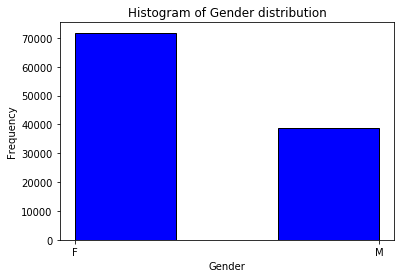

In [17]:
plt.hist(df['Gender'], color = 'blue', edgecolor = 'black',
         bins = int(180/50))
plt.title('Histogram of Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

There are around 70000 female patients and 40000 male patients in the record.

In [18]:

# name the no show records
attend=df.NoShow=="Yes"
not_attend=df.NoShow=="No"

Text(0,0.5,'Frequency')

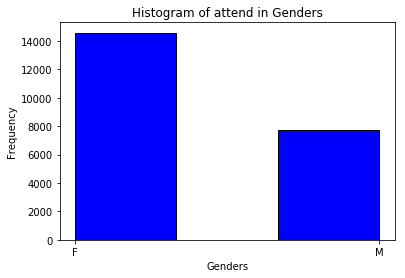

In [19]:

plt.hist(df.Gender[attend], color = 'blue', edgecolor = 'black',
         bins = int(180/50))
plt.title('Histogram of attend in Genders')
plt.xlabel('Genders')
plt.ylabel('Frequency')

The above histogram showed that there were more female patients attended for the appointments than male patients. 

Text(0,0.5,'Frequency')

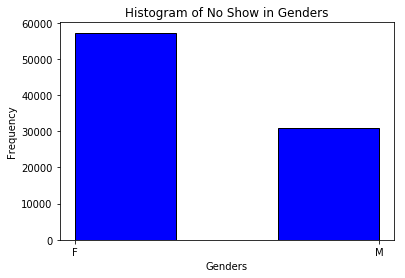

In [20]:

plt.hist(df.Gender[not_attend], color = 'blue', edgecolor = 'black',
         bins = int(180/50))
plt.title('Histogram of No Show in Genders')
plt.xlabel('Genders')
plt.ylabel('Frequency')

The above histogram showed that there were more female patients no showed for the appointments than male patients. 

In [21]:
#NoShow record categorized by genders
df.groupby ('Gender')['NoShow'].value_counts()


Gender  NoShow
F       No        57241
        Yes       14591
M       No        30962
        Yes        7725
Name: NoShow, dtype: int64

In [22]:
#Count genders
df.Gender.value_counts()

F    71832
M    38687
Name: Gender, dtype: int64

In [23]:
#Female no show
14591/71832

0.2031267401715113

In [24]:
#Male no show
7725/38687

0.19967947889471915

The percentage of no show in female group is slightly higher than male group. The percentage of no show in female group is 20.31%.  The percentage of no show in male group is 19.67%. 

### Question 3: What is the distribution of age of show and no show?

Text(0,0.5,'Frequency')

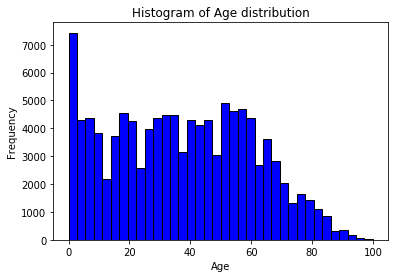

In [25]:

# matplotlib histogram
plt.hist(df['Age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.title('Histogram of Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

According to the above histogram, we can tell that the age distribution is skew to the right. The mode of age is at the age of baby.

Text(0,0.5,'Frequency')

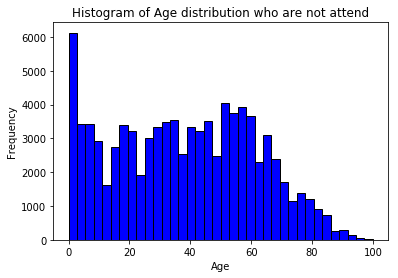

In [26]:
plt.hist(df.Age[not_attend], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.title('Histogram of Age distribution who are not attend')
plt.xlabel('Age')
plt.ylabel('Frequency')

According to the above histogram, we can tell that the no show record corresponding to age is skew to the right. Fewer no shows were happend the older people.

Text(0,0.5,'Frequency')

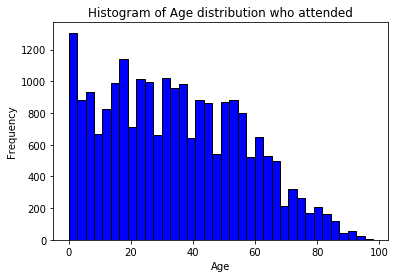

In [27]:
plt.hist(df.Age[attend], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.title('Histogram of Age distribution who attended')
plt.xlabel('Age')
plt.ylabel('Frequency')

According to the above histogram, we can tell that the attended record corresponding to age is skew to the right. Fewer no shows were happend the older people. With the increase in age, the attend frequency decreased and increased until the age around 60. Then there is a sharply decrease of attended record for older people.

### Question 4: Which day of the week is more likely to have no-show? What is the distribution look like?

Text(0,0.5,'Frequency')

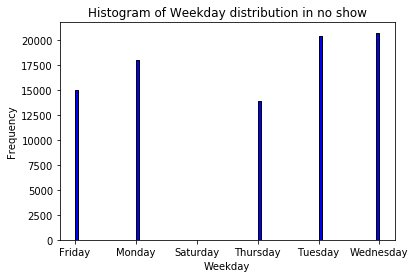

In [28]:
plt.hist(df.WeekDay[not_attend], color = 'blue', edgecolor = 'black',
         bins = int(180/2))
plt.title('Histogram of Weekday distribution in no show')
plt.xlabel('Weekday')
plt.ylabel('Frequency')

According to the above histogram, only few patients are no show on Saturday's appointment. It is most likely that the patients are not showing at the appointments on Tuesday and Wednesday.

In [29]:
df.groupby ('WeekDay')['NoShow'].value_counts()

WeekDay    NoShow
Friday     No        14981
           Yes        4037
Monday     No        18023
           Yes        4689
Saturday   No           30
           Yes           9
Thursday   No        13908
           Yes        3336
Tuesday    No        20487
           Yes        5152
Wednesday  No        20774
           Yes        5093
Name: NoShow, dtype: int64

In [30]:
df.WeekDay.value_counts()

Wednesday    25867
Tuesday      25639
Monday       22712
Friday       19018
Thursday     17244
Saturday        39
Name: WeekDay, dtype: int64

In [31]:
#Wednesday
print(5093/25867)
#Tuesday
print(5152/25639)
#Monday
print(4689/22712)
#Friday 
print(4037/19018)
#Thursday
print(3336/17244)
#Saturday
print(9/39)

0.19689179263153825
0.20094387456609072
0.2064547375836562
0.21227258386791462
0.19345859429366735
0.23076923076923078


Although the no show frequency is lowest on Saturdays. The percentage of no show is highest on Saturdays. The percentage of no show is lowest on Thursdays which is 19.35%.

<a id='conclusions'></a>
## Conclusions
Different categories of patients are having different performance on no show. There are more female patients than male patients in total. The percentage of no show in female group is slightly higher than male group. The percentage of no show in female group is 20.31%.  The percentage of no show in male group is 19.67%. 

Although the no show frequency is lowest on Saturdays. The percentage of no show is highest on Saturdays. The percentage of no show is lowest on Thursdays which is 19.35%.





In [32]:
df.isnull().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
NoShow            0
WeekDay           0
dtype: int64

There are some limitations in the data. 
There are no data is having null values or highly correlated having erroneous or missing values or imbalanced data. 

Based on the age distribution, most of the patients are lying on a yonunger age range, which is a great reflection to the normal distributed age range. This will lead to wrong analysis which will lead to wrong predictions or biased analysis on no show in age. 


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0